In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Time Series

In [3]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [4]:
df_train

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [5]:
df=df_train.copy()

In [6]:
df_test

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1
...,...,...,...,...
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50


In [7]:
df['date']=pd.to_datetime(df['date'])

df['date'] = df['date'].dt.year.astype('str') + '-' + df['date'].dt.month.astype('str') + '-01'
df['date'] = pd.to_datetime(df['date'])#groupby date and sum the sales
df1 = df.groupby('date').sales.sum().reset_index()

In [8]:
df1.head()

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242


In [9]:
sales_df=df1.set_index('date')
sales_df.head()

,sales
date,
2013-01-01,454904
2013-02-01,459417
2013-03-01,617382
2013-04-01,682274
2013-05-01,763242


# Visualizations

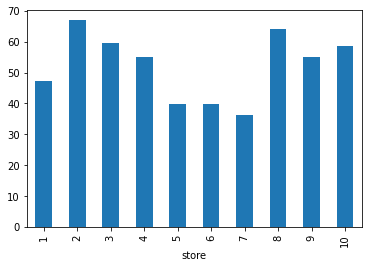

In [10]:
df.groupby('store')['sales'].mean().plot(kind='bar')

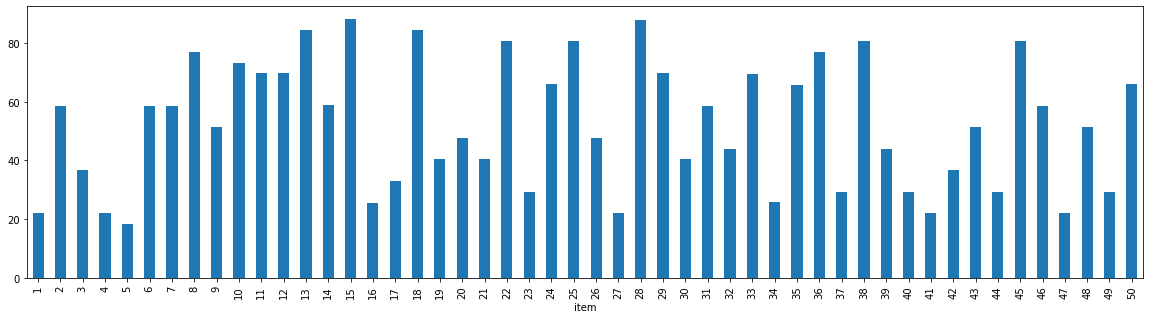

In [11]:
df.groupby('item')['sales'].mean().plot(kind='bar',figsize=(20, 5))

## Simple Moving Average

In [12]:
sales_df['sm3']=sales_df['sales'].rolling(window=3).mean().shift(1)

In [13]:
sales_df.head()

,sales,sm3
date,,
2013-01-01,454904,nan
2013-02-01,459417,nan
2013-03-01,617382,nan
2013-04-01,682274,510567.67
2013-05-01,763242,586357.67


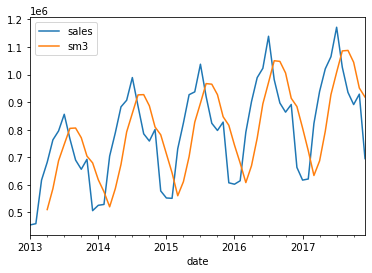

In [14]:
sales_df.plot()

## Weighted Moving Average

((t* weighting factor)+((t-1)* weighting factor-1)+..+((t-n)* weighting factor-n))/n

In [15]:
def wma(weights):
    def calc(x):
        return (weights*x).mean()
    return calc

In [16]:
sales_df['wm3']=sales_df['sales'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [17]:
sales_df.head()

,sales,sm3,wm3
date,,,
2013-01-01,454904,nan,nan
2013-02-01,459417,nan,nan
2013-03-01,617382,nan,nan
2013-04-01,682274,510567.67,537647.33
2013-05-01,763242,586357.67,623500.50


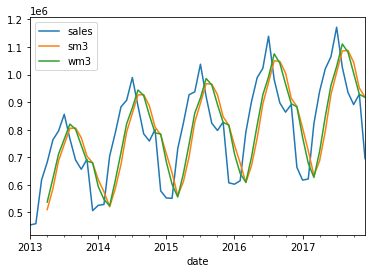

In [18]:
sales_df.plot()

Explains Seasonality with a time lag

## Exponential Moving Averages

(close-previous EMA)* (2/(span+1))+ previous EMA

In [19]:
sales_df['em3']=sales_df['sales'].ewm(span=3,adjust=False,min_periods=0).mean().shift(1)

In [20]:
sales_df.head()

,sales,sm3,wm3,em3
date,,,,
2013-01-01,454904,nan,nan,nan
2013-02-01,459417,nan,nan,454904.00
2013-03-01,617382,nan,nan,457160.50
2013-04-01,682274,510567.67,537647.33,537271.25
2013-05-01,763242,586357.67,623500.50,609772.62


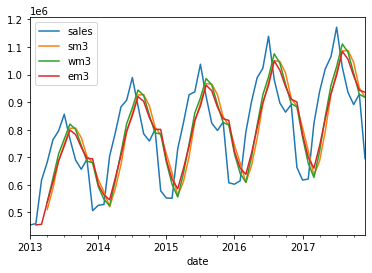

In [21]:
sales_df.plot()

## Exponential Smoothing

Alpha is called Smoothing Factor or Smoothing Coeffecient 0 < alpha <1

In [22]:
sales_df['es3']=sales_df['sales'].ewm(alpha=0.7,adjust=False,min_periods=3).mean().shift(1)

In [23]:
sales_df.head()

,sales,sm3,wm3,em3,es3
date,,,,,
2013-01-01,454904,nan,nan,nan,nan
2013-02-01,459417,nan,nan,454904.00,nan
2013-03-01,617382,nan,nan,457160.50,nan
2013-04-01,682274,510567.67,537647.33,537271.25,569586.33
2013-05-01,763242,586357.67,623500.50,609772.62,648467.70


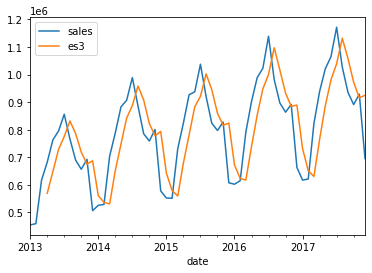

In [24]:
sales_df[['sales','es3']].plot()

In [25]:
sales_df['es3_3']=sales_df['sales'].ewm(alpha=0.3,adjust=False,min_periods=3).mean().shift(1)

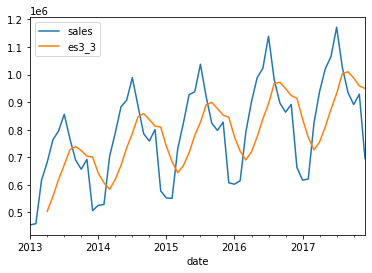

In [26]:
sales_df[['sales','es3_3']].plot()

Takes Historical Obseration into Account.Use Low Alpha Values to Smooth the prediction

## RMSE 

## Resample

Weekly, Monthly and Quarterly Resample

In [27]:
rs=df_train[['date','sales']]

In [28]:
rs['date'] = pd.to_datetime(rs['date'])

<ipython-input-28-603fb6eb5b25>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rs['date'] = pd.to_datetime(rs['date'])


In [29]:
rsd=rs.copy()

Monthly

In [30]:
rs=pd.DataFrame(rs.groupby('date')['sales'].sum())

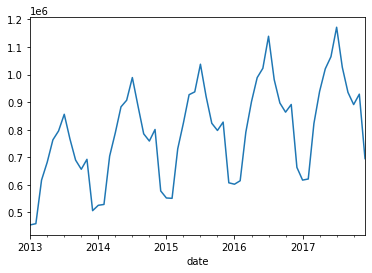

In [31]:
sales_df['sales'].plot()

Quarterly

In [32]:
rsq=rs.resample('Q').mean().round()

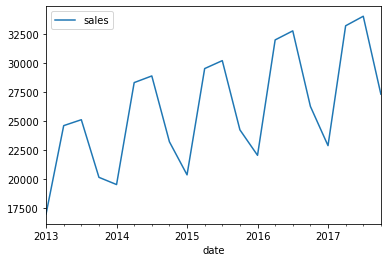

In [33]:
rsq.plot()

Weekly

In [34]:
rsw=rs.resample('W').mean().round()

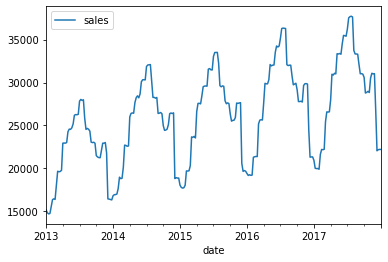

In [35]:
rsw.plot()

Daily

In [36]:
rsd.set_index('date',inplace=True)

In [37]:
rsd=rsd.resample('D').sum().round()

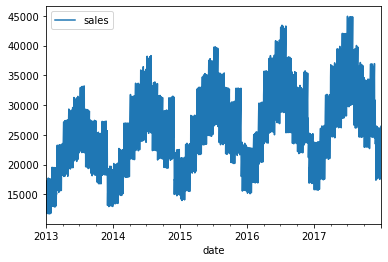

In [38]:
rsd.plot()

### Diff, Shift and Rolling window

In [39]:
temp=df1.copy()

In [40]:
temp.set_index('date',inplace=True)

In [41]:
temp[:5]

,sales
date,
2013-01-01,454904
2013-02-01,459417
2013-03-01,617382
2013-04-01,682274
2013-05-01,763242


In [42]:
temp.diff()[:5]

,sales
date,
2013-01-01,nan
2013-02-01,4513.00
2013-03-01,157965.00
2013-04-01,64892.00
2013-05-01,80968.00


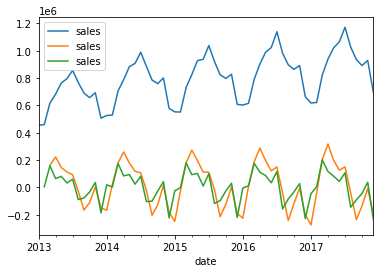

In [43]:
pd.concat([temp['sales'],temp['sales'].diff(2),temp['sales'].diff()],axis=1).plot()

This can convert the TS to Stationary series

* TSHIFT shifts the Index by a desired Value 


* Shifting the time period by one year or month 

In [44]:
temp['sales'].head()

date
2013-01-01    454904
2013-02-01    459417
2013-03-01    617382
2013-04-01    682274
2013-05-01    763242
Name: sales, dtype: int64

In [45]:
temp['sales'].shift().head()

date
2013-01-01         nan
2013-02-01   454904.00
2013-03-01   459417.00
2013-04-01   617382.00
2013-05-01   682274.00
Name: sales, dtype: float64

In [46]:
temp['sales'].tshift(2).head()

date
2013-03-01    454904
2013-04-01    459417
2013-05-01    617382
2013-06-01    682274
2013-07-01    763242
Freq: MS, Name: sales, dtype: int64

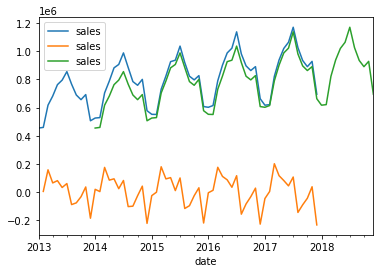

In [47]:
pd.concat([temp,temp-temp.shift(), temp.tshift(12)],axis=1).plot()

The TS is Stationary around mean

In [48]:
temp.shape

(60, 1)

Rolling Window - Average of Particular Time Window
* TS becomes Smooth
* Feature Engineering

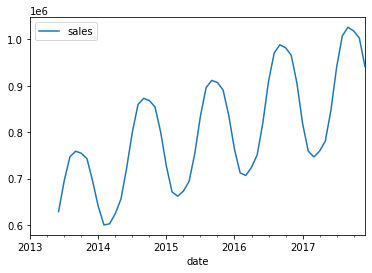

In [49]:
temp.rolling(window=6).mean().plot()

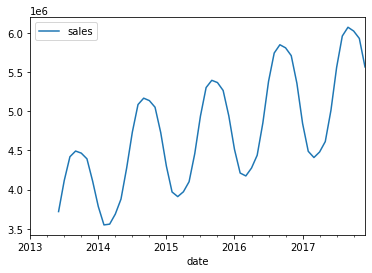

In [50]:
temp.rolling(window=6,win_type='gaussian').sum(std =10).plot() 

# if we add window type gaussian with std dev of 10 the it is adding some weights to the data

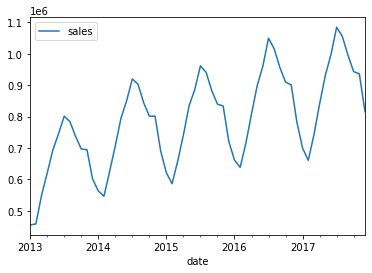

In [51]:
temp.ewm(span=3).mean().plot()

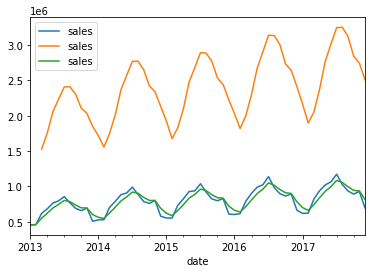

In [52]:
pd.concat([temp,temp.rolling(window=3,win_type='gaussian').sum(std =10),temp.ewm(span=3).mean()],axis=1).plot()

### Other Functions

* Percentage Change
* Cumulative sum
* Expanding 

Percentage change 2 is for t-2 changes , means it will check the how much the price has changes from previous t-2 datapoint.


In [53]:
temp[:5].pct_change(2)

,sales
date,
2013-01-01,nan
2013-02-01,nan
2013-03-01,0.36
2013-04-01,0.49
2013-05-01,0.24


In [54]:
temp[:5].expanding().mean()

,sales
date,
2013-01-01,454904.00
2013-02-01,457160.50
2013-03-01,510567.67
2013-04-01,553494.25
2013-05-01,595443.80


# Auto ARIMA